# Image Classification with CNN (Convolutional Neural Network)
![](https://miro.medium.com/v2/resize:fit:1400/1*lbDXL0IuitCRz4mpZ7MmfQ.png)


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (for use with categorical_crossentropy)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 2s 0us/step


1. **Loading the CIFAR-10 data**:
   - `cifar10.load_data()`: This function is used to load the CIFAR-10 dataset. CIFAR-10 is a widely used dataset consisting of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The function returns two tuples: `(x_train, y_train)` containing training images and their corresponding labels, and `(x_test, y_test)` containing test images and their labels.

2. **Normalization**:
   - `x_train, x_test = x_train / 255.0, x_test / 255.0`: After loading the data, the pixel values of the images are normalized to be between 0 and 1. This is a common preprocessing step in many machine learning tasks, especially when working with image data. Dividing by 255.0 achieves this normalization since the pixel values are typically integers ranging from 0 to 255.

3. **One-Hot Encoding**:
   - `to_categorical(y_train, 10)`, `to_categorical(y_test, 10)`: In multi-class classification tasks like CIFAR-10, the target labels are often represented as integers indicating the class index (e.g., 0 for airplane, 1 for automobile, etc.). However, in order to train a neural network using categorical crossentropy loss, it's necessary to convert these labels into a binary class matrix representation, commonly known as one-hot encoding. This means each label is converted into a binary matrix where each row corresponds to a label, and the columns represent the classes. The value 1 is placed at the index corresponding to the class, and all other values are set to 0. The second argument, `10`, indicates the number of classes in the dataset.

Here's a simple example to illustrate how the one-hot encoding works:

Let's say you have 3 classes: cat, dog, and bird.

- Original labels: `[1, 0, 2, 1]`
- After one-hot encoding:
  ```
  [[0, 1, 0],  # cat
   [1, 0, 0],  # dog
   [0, 0, 1],  # bird
   [0, 1, 0]]  # cat
  ```

Each row corresponds to an original label, and the value 1 is placed at the index corresponding to the class, while other indices are set to 0. This format is suitable for training models with categorical crossentropy loss.

In [3]:
model = models.Sequential([
    # Convolutional base
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

The code defines a convolutional neural network (CNN) model using the Keras Sequential API for classification tasks on the CIFAR-10 dataset.

1. **Sequential Model**:
   - `model = models.Sequential([...])`: This line initializes a sequential model, which is a linear stack of layers. Layers are added to this model one by one in the order they are specified within the list.

2. **Convolutional Base**:
   - Convolutional layers are used to extract features from the input images.
     - `layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))`: This line adds a 2D convolutional layer with 32 filters, each with a kernel size of 3x3. The activation function used is ReLU (Rectified Linear Unit), which introduces non-linearity to the model. The `input_shape` parameter specifies the shape of the input data, which is (32, 32, 3) for CIFAR-10 images (32x32 pixels with 3 color channels).
     - `layers.MaxPooling2D((2, 2))`: Max pooling is a downsampling operation that reduces the dimensionality of each feature map while retaining the most important information. Here, a max-pooling layer with a pool size of 2x2 is added after each convolutional layer to reduce spatial dimensions.

3. **Dense Layers**:
   - Dense layers are fully connected layers that perform classification based on the features extracted by the convolutional layers.
     - `layers.Flatten()`: This layer flattens the input into a 1D array. It is necessary to transition from the convolutional part of the network to the dense layers.
     - `layers.Dense(64, activation='relu')`: This line adds a dense layer with 64 units (neurons) and applies the ReLU activation function.
     - `layers.Dense(10, activation='softmax')`: The final dense layer consists of 10 units, corresponding to the 10 classes in the CIFAR-10 dataset. The activation function used here is softmax, which outputs probabilities for each class, ensuring that the sum of probabilities across all classes is equal to 1.

Overall, this model architecture consists of three convolutional layers followed by max-pooling, followed by two dense layers for classification. The ReLU activation function is used for the hidden layers, and softmax is used for the output layer to obtain class probabilities. This model is suitable for image classification tasks like CIFAR-10.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

1. **Optimizer**:
   - `optimizer='adam'`: Adam is an optimization algorithm that is widely used for training deep learning models. It adapts the learning rate during training, making it efficient and effective for various types of data and models.

2. **Loss Function**:
   - `loss='categorical_crossentropy'`: Categorical crossentropy is a loss function commonly used for multi-class classification problems where each example belongs to a single class. It measures the difference between the true distribution and the predicted distribution of the classes. In this case, since the labels have been one-hot encoded (using `to_categorical`), categorical crossentropy is an appropriate choice.

3. **Metrics**:
   - `metrics=['accuracy']`: During training, it's important to monitor the performance of the model on a metric that is relevant to the task. In this case, accuracy is chosen as the metric. Accuracy measures the proportion of correctly classified examples out of the total number of examples. It provides a straightforward interpretation of how well the model is performing in terms of classification accuracy.


With this compilation step, the model is ready to be trained using the specified optimizer, loss function, and evaluation metric. During training, the optimizer adjusts the model's parameters to minimize the categorical crossentropy loss, while the accuracy metric provides feedback on the model's performance.

In [5]:
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_test, y_test))

Epoch 1/2
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5036 - accuracy: 0.4509 - val_loss: 1.3388 - val_accuracy: 0.5295
Epoch 2/2
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1644 - accuracy: 0.5848 - val_loss: 1.0747 - val_accuracy: 0.6199


The code trains the compiled model using the training data `(x_train, y_train)` and evaluates its performance on the validation data `(x_test, y_test)`. Here's a breakdown of each parameter:

1. **Training Data**:
   - `x_train`: This is the input training data, typically a set of images. It contains the features on which the model will be trained.
   - `y_train`: This is the target training data corresponding to `x_train`. It contains the labels or target outputs for each input example. These labels are typically one-hot encoded for multi-class classification tasks like CIFAR-10.

2. **Epochs**:
   - `epochs=2`: An epoch is one complete pass through the entire training dataset. In this case, the model will be trained for 2 epochs, meaning it will see the entire training dataset twice during training.

3. **Validation Data**:
   - `validation_data=(x_test, y_test)`: During training, it's important to monitor the performance of the model on data that it hasn't seen before. This helps to detect overfitting and provides an estimate of the model's generalization ability. Here, `(x_test, y_test)` serves as the validation data. `x_test` contains the input test data, and `y_test` contains the corresponding target labels.

The `fit()` method returns a `history` object that contains information about the training process, including the loss and accuracy metrics on both the training and validation data for each epoch.


After running this code, the model will undergo training for 2 epochs, and the training progress will be stored in the `history` object. You can then use this object to analyze the training and validation metrics, plot training curves, and assess the model's performance.

In [6]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


In [7]:
predicted_classes = np.argmax(predictions, axis=1)

1. **Making Predictions**:
   - `predictions = model.predict(x_test)`: This line uses the trained model (`model`) to predict the output for the test data (`x_test`). The `predict` method computes the output predictions for the input data. In this case, `predictions` will be an array containing the predicted probabilities for each class for each test example. Each row corresponds to a test example, and each column corresponds to a class. So, `predictions[i, j]` represents the probability of the ith test example belonging to the jth class.

2. **Interpreting Predictions**:
   - `predicted_classes = np.argmax(predictions, axis=1)`: After obtaining the predicted probabilities for each class, this line extracts the predicted classes from these probabilities. The `np.argmax` function is used to find the index of the maximum probability along the specified axis (axis=1 indicates along the columns). This index corresponds to the predicted class label. So, `predicted_classes[i]` will be the predicted class label for the ith test example.


After running this code, `predictions` will contain the predicted probabilities for each class for each test example, and `predicted_classes` will contain the predicted class labels for each test example. You can then compare these predictions with the actual labels (`y_test`) to evaluate the model's accuracy and performance.

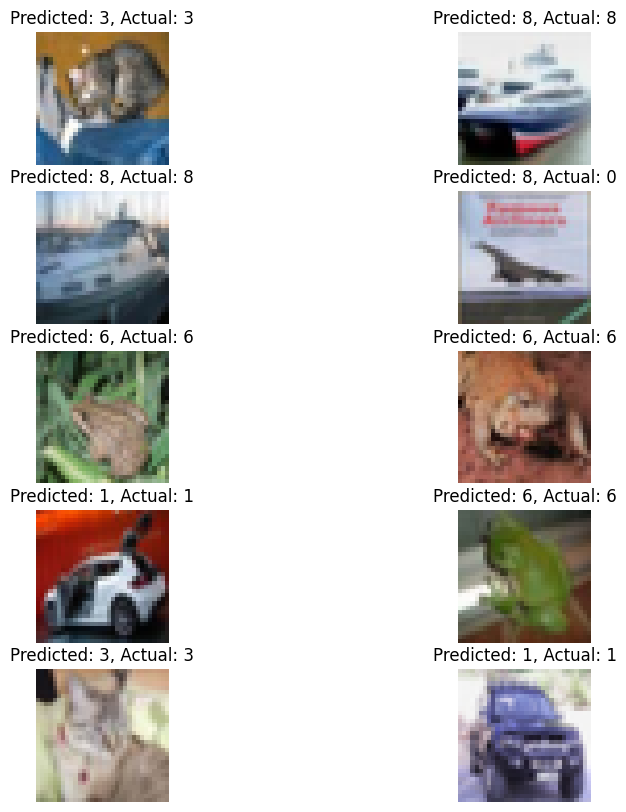

In [8]:
plt.figure(figsize=(10, 10))
for i in range(10):  # Display predictions for the first 10 samples
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.show()